In [1]:
import torch 
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0, 799, 800)
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [4]:
y = torch.sin(x*2*3.14/40)

In [5]:
y

tensor([ 0.0000,  0.1564,  0.3089,  0.4538,  0.5875,  0.7068,  0.8087,  0.8908,
         0.9509,  0.9876,  1.0000,  0.9878,  0.9514,  0.8915,  0.8097,  0.7080,
         0.5888,  0.4552,  0.3104,  0.1579,  0.0016, -0.1548, -0.3074, -0.4524,
        -0.5862, -0.7057, -0.8078, -0.8900, -0.9504, -0.9873, -1.0000, -0.9881,
        -0.9518, -0.8922, -0.8106, -0.7091, -0.5901, -0.4566, -0.3119, -0.1595,
        -0.0032,  0.1532,  0.3058,  0.4509,  0.5849,  0.7046,  0.8069,  0.8893,
         0.9499,  0.9871,  1.0000,  0.9883,  0.9523,  0.8929,  0.8115,  0.7102,
         0.5914,  0.4580,  0.3134,  0.1611,  0.0048, -0.1516, -0.3043, -0.4495,
        -0.5837, -0.7034, -0.8059, -0.8886, -0.9494, -0.9868, -1.0000, -0.9886,
        -0.9528, -0.8936, -0.8125, -0.7113, -0.5927, -0.4594, -0.3149, -0.1626,
        -0.0064,  0.1501,  0.3028,  0.4481,  0.5824,  0.7023,  0.8050,  0.8878,
         0.9489,  0.9866,  1.0000,  0.9888,  0.9533,  0.8943,  0.8134,  0.7124,
         0.5940,  0.4609,  0.3164,  0.16

(-10.0, 801.0)

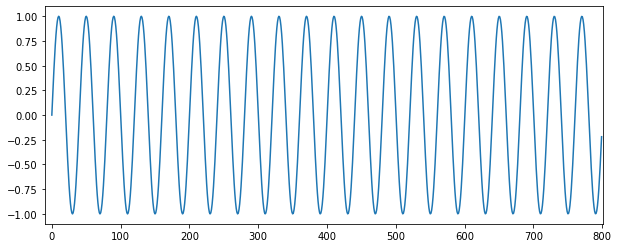

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlim(-10, 801)

In [16]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

(-10.0, 801.0)

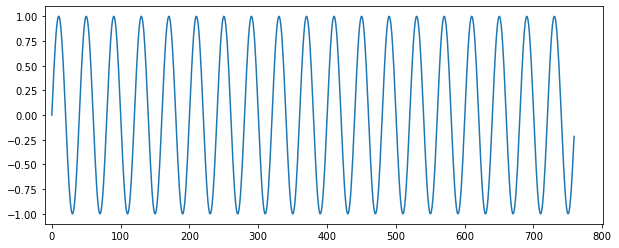

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(train_set)
plt.xlim(-10, 801)

In [19]:
def input_data(seq, ws):
    out = [] # ([0, 1, 2, 3], [4]), ([1, 2, 3, 4], [5]) ...
    L = len(seq)

    for i in range(L - ws):
        window = seq[i:i + ws]
        label = seq[i + ws:i + ws + 1]
        out.append((window, label))

    return out

In [20]:
window_size = 40

train_data = input_data(train_set, window_size)

In [23]:
len(train_data)

720

## Creating LSTM Model

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size)

        self.Linear = nn.Linear(hidden_size, output_size)


        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)

        pred = self.Linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [27]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (Linear): Linear(in_features=50, out_features=1, bias=True)
)

In [29]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


## Training and forecasting

Epoch 0  Loss: 0.08481471985578537
Performance on test range: 0.6415334343910217


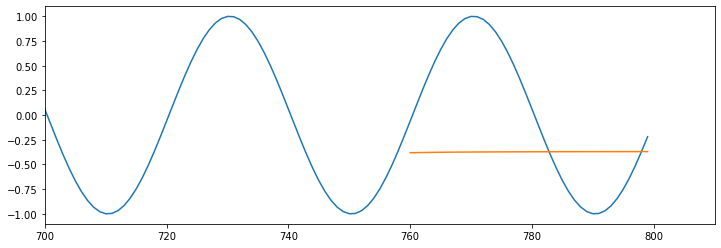

Epoch 1  Loss: 0.06112842261791229
Performance on test range: 0.596203625202179


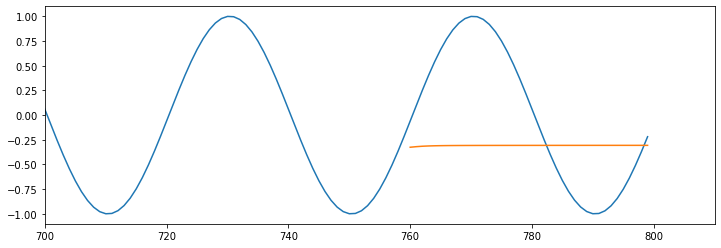

Epoch 2  Loss: 0.03998904675245285
Performance on test range: 0.5440462827682495


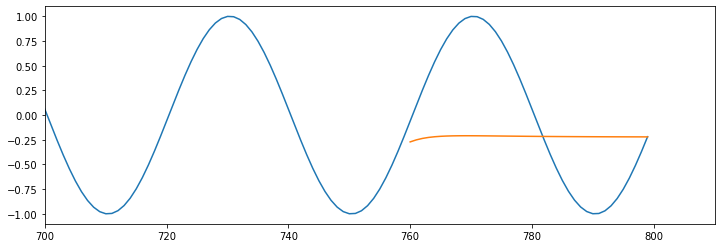

Epoch 3  Loss: 0.01750938780605793
Performance on test range: 0.43637213110923767


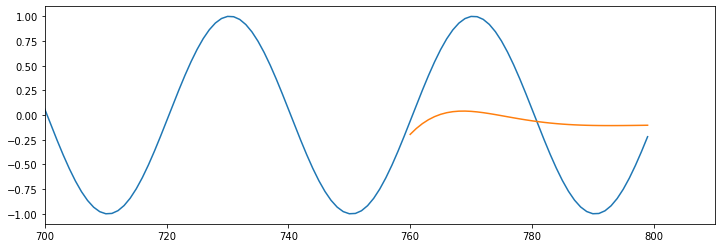

Epoch 4  Loss: 0.003253849456086755
Performance on test range: 0.1660226732492447


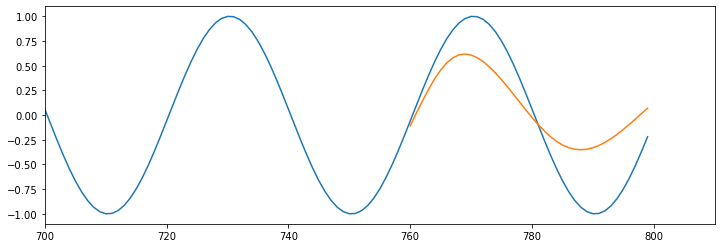

Epoch 5  Loss: 0.0005476845544762909
Performance on test range: 0.028943564742803574


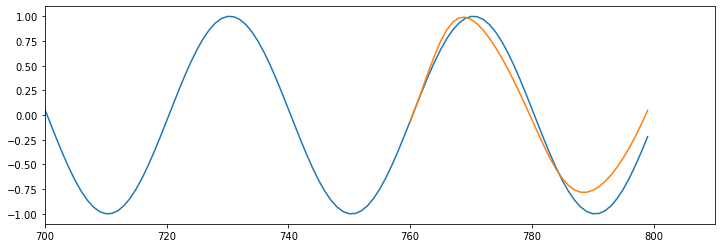

Epoch 6  Loss: 0.0002950012276414782
Performance on test range: 0.014234766364097595


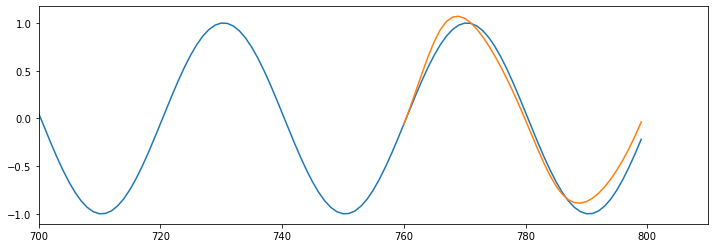

Epoch 7  Loss: 0.00027586673968471587
Performance on test range: 0.011253941804170609


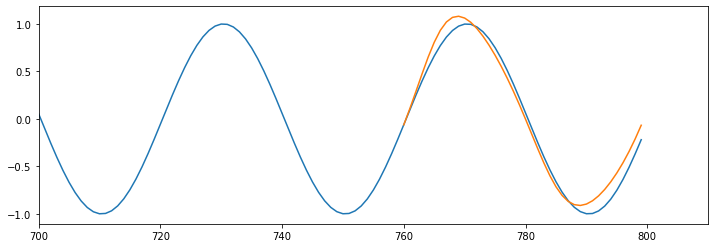

Epoch 8  Loss: 0.00027961411979049444
Performance on test range: 0.009612913243472576


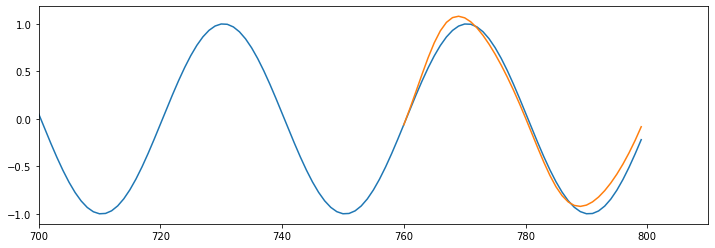

Epoch 9  Loss: 0.00028185866540297866
Performance on test range: 0.008386360481381416


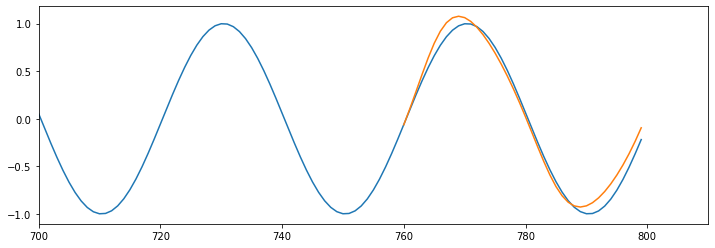

In [30]:
epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)

        loss.backward()
        optimizer.step()

    print(f'Epoch {i}  Loss: {loss.item()}')

    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[-window_size:])
    print(f'Performance on test range: {loss}')

    plt.figure(figsize=(12, 4))
    plt.xlim(700, 810)
    plt.plot(y)
    plt.plot(range(760, 800), preds[-window_size:])
    plt.show()

In [31]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)

In [32]:
import time 
start_time = time.time()

epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)

        loss.backward()
        optimizer.step()

    print(f'Epoch {i}  Loss: {loss.item()}')

total_time = time.time() - start_time
print(total_time)

Epoch 0  Loss: 0.0002803436655085534
Epoch 1  Loss: 0.000275723694358021
Epoch 2  Loss: 0.00026889238506555557
Epoch 3  Loss: 0.00026057942886836827
Epoch 4  Loss: 0.0002513483923394233
Epoch 5  Loss: 0.0002416265051579103
Epoch 6  Loss: 0.00023172555665951222
Epoch 7  Loss: 0.00022186656133271754
Epoch 8  Loss: 0.00021220711641944945
Epoch 9  Loss: 0.00020285772916395217
69.47187423706055


## Forecast into unknown future

In [37]:
pred = y[-window_size].tolist()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        preds.append(model(seq).item())

In [40]:
plt.figure(figsize=(12, 4))
plt.xlim(0, 850)
plt.plot(y.numpy())
# Plotting forcast
plt.plot(range(800, 800 + future), preds[window_size:])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (40,) and (120,)